<a href="https://colab.research.google.com/github/Dhrimanti/AI_Ig/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import tensorflow as tf

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-04-21 13:41:11.023021


In [ ]:
!nvidia-smi

Sun Apr 21 13:41:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-21 13:41:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.5MB/s    in 5.6s    

2024-04-21 13:41:17 (18.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


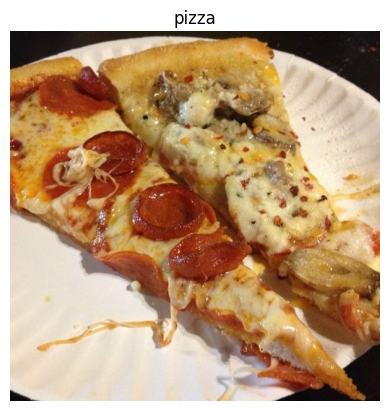

In [ ]:
import os
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")


In [ ]:
img.shape
tf.constant(img/255)
img/255

array([[[0.07058824, 0.05490196, 0.05098039],
        [0.06666667, 0.05098039, 0.04705882],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ]],

       [[0.08235294, 0.06666667, 0.0627451 ],
        [0.0745098 , 0.05882353, 0.05490196],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353]],

       [[0.08627451, 0.07058824, 0.06666667],
        [0.0745098 , 0.05882353, 0.05490196],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ]],

       ...,

       [[0.05882353, 0.05098039, 0.05490196],
        [0.05490196, 0.04705882, 0.05098039],
        [0.05490196, 0

In [ ]:
img/255

array([[[0.07058824, 0.05490196, 0.05098039],
        [0.06666667, 0.05098039, 0.04705882],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ]],

       [[0.08235294, 0.06666667, 0.0627451 ],
        [0.0745098 , 0.05882353, 0.05490196],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353]],

       [[0.08627451, 0.07058824, 0.06666667],
        [0.0745098 , 0.05882353, 0.05490196],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ],
        [0.09411765, 0.0745098 , 0.0627451 ]],

       ...,

       [[0.05882353, 0.05098039, 0.05490196],
        [0.05490196, 0.04705882, 0.05098039],
        [0.05490196, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),#224,224 will come from the above reshaping ofthe above function and 3 is for the colour strings
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 161ms/step - loss: 0.5465 - accuracy: 0.7067 - val_loss: 0.3844 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4410 - accuracy: 0.8007 - val_loss: 0.3897 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3655 - accuracy: 0.8453 - val_loss: 0.3615 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.2887 - accuracy: 0.8867 - val_loss: 0.3299 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.1780 - accuracy: 0.9460 - val_loss: 0.3718 - val_accuracy: 0.8400


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 flatten (Flatten)           (None, 112360)            0         
                                                        

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 84ms/step - loss: 0.8245 - accuracy: 0.4793
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history3=model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 82ms/step - loss: 3.4886 - accuracy: 0.6253
Epoch 2/5
47/47 [==============================] - 4s 91ms/step - loss: 1.8885 - accuracy: 0.6753
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 1.0882 - accuracy: 0.6947
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6135 - accuracy: 0.7547
Epoch 5/5
47/47 [==============================] - 5s 99ms/step - loss: 0.5697 - accuracy: 0.7600


Preprocessing The Data


In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary")
valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential


In [ ]:
model4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)
           ),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history4=model4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 0.7457 - accuracy: 0.7073 - val_loss: 0.3758 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4079 - accuracy: 0.8240 - val_loss: 0.3637 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.2806 - accuracy: 0.8887 - val_loss: 0.4883 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.1357 - accuracy: 0.9613 - val_loss: 0.4003 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.0475 - accuracy: 0.9893 - val_loss: 0.4224 - val_accuracy: 0.8320


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model4.evaluate(valid_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.4224 - accuracy: 0.8320


[0.4224250018596649, 0.8320000171661377]

In [ ]:
model1.evaluate(valid_data)
# history4.history

16/16 [==============================] - 2s 91ms/step - loss: 0.3718 - accuracy: 0.8400


[0.3718104362487793, 0.8399999737739563]

<Axes: >

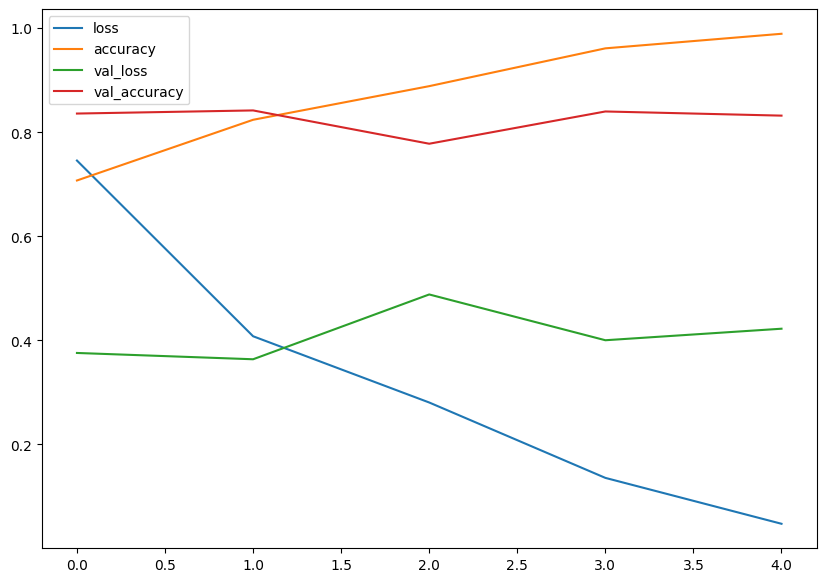

In [ ]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [ ]:
def plot_his(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


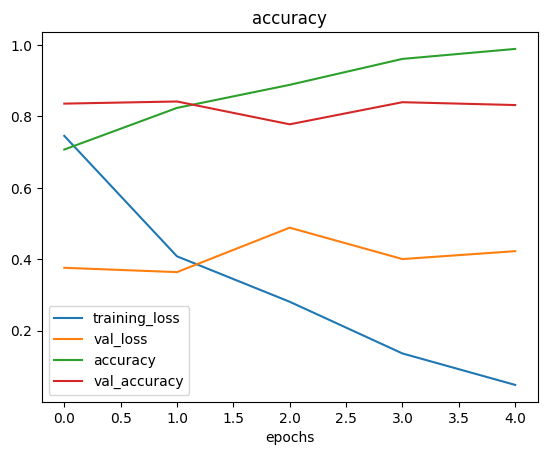

In [ ]:
plot_his(history4)

In [ ]:
model5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

]
)

In [ ]:
model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [ ]:
history5=model5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 0.5753 - accuracy: 0.7153 - val_loss: 0.4476 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4647 - accuracy: 0.7920 - val_loss: 0.3907 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4349 - accuracy: 0.8113 - val_loss: 0.3910 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4067 - accuracy: 0.8273 - val_loss: 0.3618 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3549 - accuracy: 0.8453 - val_loss: 0.3403 - val_accuracy: 0.8600


In [ ]:
model6=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),##MaxPooling always halves the layers in the above layer after conv2d (222,222,3) max pooling will create (111,111,3)
    Conv2D(10,3,activation="relu"),#This is done so that the conv  layer will learn the most important features instead of random features as max pooling eliminatesthe unecessary features
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history6=model6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))##

Epoch 1/5
47/47 [==============================] - 8s 149ms/step - loss: 0.5964 - accuracy: 0.6707 - val_loss: 0.4158 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4420 - accuracy: 0.7980 - val_loss: 0.3663 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4144 - accuracy: 0.8187 - val_loss: 0.3836 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3969 - accuracy: 0.8213 - val_loss: 0.3384 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.3690 - accuracy: 0.8420 - val_loss: 0.3358 - val_accuracy: 0.8620


In [ ]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
type(tf.constant(["Hello"]).numpy())

numpy.ndarray

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=True)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


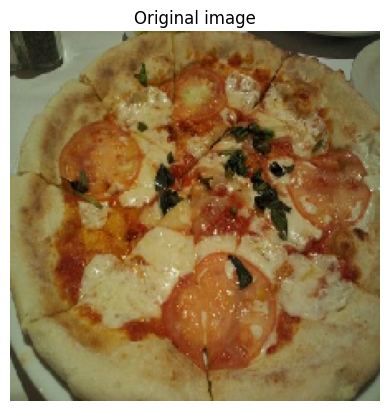

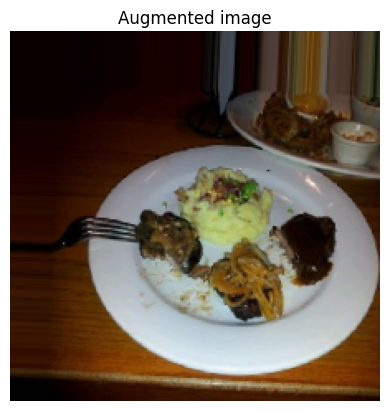

In [ ]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model7=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])
model7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history7=model7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 442ms/step - loss: 0.6784 - accuracy: 0.5520 - val_loss: 0.6227 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6054 - accuracy: 0.6773 - val_loss: 0.5237 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5550 - accuracy: 0.7213 - val_loss: 0.4725 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5241 - accuracy: 0.7420 - val_loss: 0.4259 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 22s 480ms/step - loss: 0.4858 - accuracy: 0.7767 - val_loss: 0.3665 - val_accuracy: 0.8500


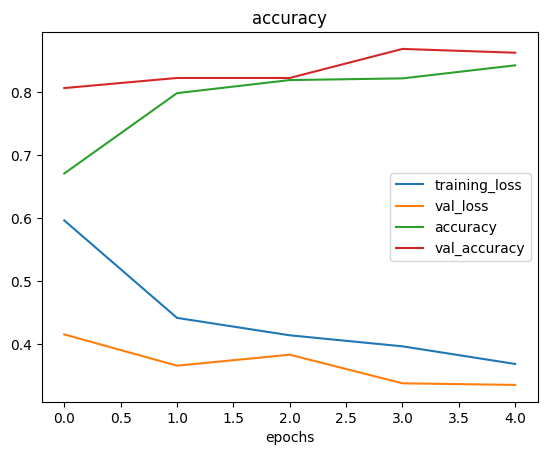

In [ ]:
plot_his(history6)

In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model8=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])
model8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
               )
history8=model8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 478ms/step - loss: 0.6724 - accuracy: 0.6020 - val_loss: 0.5354 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.5774 - accuracy: 0.7020 - val_loss: 0.4359 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5259 - accuracy: 0.7347 - val_loss: 0.4289 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4934 - accuracy: 0.7780 - val_loss: 0.3939 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4826 - accuracy: 0.7833 - val_loss: 0.3418 - val_accuracy: 0.8520


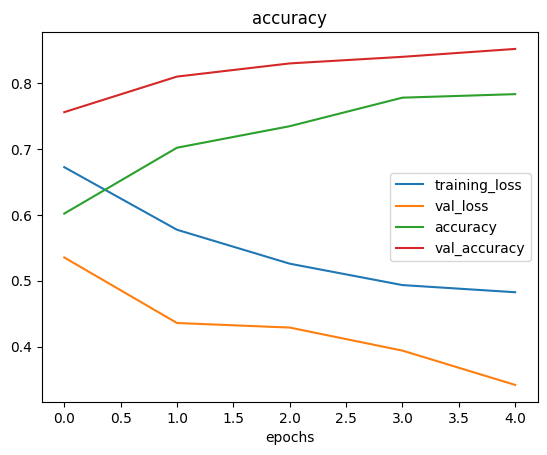

In [ ]:
plot_his(history8)

Custom Data Practice



In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
import matplotlib.image as mpimg
pizza=mpimg.imread("/content/pizza.jpg")
plt.imshow(steak)

--2024-04-21 13:54:34--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2024-04-21 13:54:34--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2024-04-21 13:54:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.

NameError: name 'steak' is not defined

In [ ]:
steak.shape

Preprocessing The Data


In [ ]:
def load_and_prep(file_name,img_shape=224):
  img=tf.io.read_file(file_name)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255
  return img


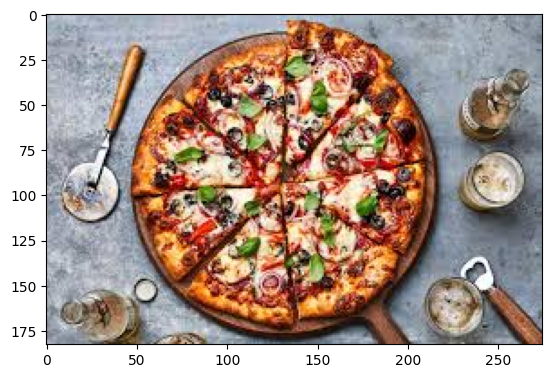

In [ ]:

import matplotlib.image as mpimg
pizza=mpimg.imread("/content/pizza.jpg")
plt.imshow(pizza)

In [ ]:
pred=model8.predict(tf.expand_dims(pizza,axis=0))

1/1 [==============================] - 0s 319ms/step


In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'pizza'